In [1]:
from sklearn.metrics import r2_score
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
MSE1 = []
itern1 = []
class Airfoil1:

    def __init__(self, iters=30000, alpha=0.0002, reg_param=0):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
        return array

    def train(self, trainpath):
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = np.random.rand(X_part.shape[1], 1)
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern1.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE1.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
            print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
        print("score")
        print(r2_score(self.y_test, preds))
        return preds
    
model3 = Airfoil1()
model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
prediction3 = model3.predict('./Datasets/q3/test.csv')

thetas
[[0.19528066]
 [0.72953242]
 [0.32833567]
 [0.31688755]
 [0.66586377]
 [0.27067057]]
iter 1 cost = 7693.918583465306
iter 2 cost = 4225.18237813533
iter 3 cost = 2368.1545914295352
iter 4 cost = 1372.78912106384
iter 5 cost = 838.1310813161004
iter 6 cost = 549.8390094930633
iter 7 cost = 393.3293010107458
iter 8 cost = 307.34592843504674
iter 9 cost = 259.1402561545982
iter 10 cost = 231.20293810865874
iter 11 cost = 214.17119888823524
iter 12 cost = 203.03728232591902
iter 13 cost = 195.12160144017355
iter 14 cost = 188.9892428732103
iter 15 cost = 183.87075941078447
iter 16 cost = 179.352539372
iter 17 cost = 175.2112835706369
iter 18 cost = 171.32551786799144
iter 19 cost = 167.62828672178554
iter 20 cost = 164.0818609757227
iter 21 cost = 160.66421393313524
iter 22 cost = 157.36178853919313
iter 23 cost = 154.16562773797017
iter 24 cost = 151.06930281608874
iter 25 cost = 148.06780302611395
iter 26 cost = 145.15693920658805
iter 27 cost = 142.3330222896108
iter 28 cost = 13

iter 1101 cost = 11.699896855833929
iter 1102 cost = 11.699333212494341
iter 1103 cost = 11.698771884762214
iter 1104 cost = 11.698212862190063
iter 1105 cost = 11.69765613438302
iter 1106 cost = 11.697101690998457
iter 1107 cost = 11.696549521745766
iter 1108 cost = 11.695999616386029
iter 1109 cost = 11.695451964731738
iter 1110 cost = 11.694906556646531
iter 1111 cost = 11.694363382044862
iter 1112 cost = 11.693822430891759
iter 1113 cost = 11.693283693202524
iter 1114 cost = 11.692747159042456
iter 1115 cost = 11.692212818526578
iter 1116 cost = 11.691680661819348
iter 1117 cost = 11.691150679134397
iter 1118 cost = 11.690622860734255
iter 1119 cost = 11.690097196930067
iter 1120 cost = 11.689573678081349
iter 1121 cost = 11.689052294595687
iter 1122 cost = 11.68853303692849
iter 1123 cost = 11.688015895582732
iter 1124 cost = 11.687500861108669
iter 1125 cost = 11.68698792410359
iter 1126 cost = 11.686477075211558
iter 1127 cost = 11.685968305123147
iter 1128 cost = 11.68546160457

iter 2060 cost = 11.557765097097905
iter 2061 cost = 11.557748973289273
iter 2062 cost = 11.55773290636326
iter 2063 cost = 11.557716896117583
iter 2064 cost = 11.55770094235069
iter 2065 cost = 11.557685044861785
iter 2066 cost = 11.557669203450756
iter 2067 cost = 11.557653417918246
iter 2068 cost = 11.557637688065604
iter 2069 cost = 11.557622013694893
iter 2070 cost = 11.557606394608895
iter 2071 cost = 11.557590830611105
iter 2072 cost = 11.557575321505716
iter 2073 cost = 11.557559867097636
iter 2074 cost = 11.55754446719248
iter 2075 cost = 11.55752912159656
iter 2076 cost = 11.557513830116877
iter 2077 cost = 11.557498592561148
iter 2078 cost = 11.557483408737756
iter 2079 cost = 11.557468278455806
iter 2080 cost = 11.557453201525059
iter 2081 cost = 11.55743817775599
iter 2082 cost = 11.557423206959736
iter 2083 cost = 11.557408288948132
iter 2084 cost = 11.557393423533668
iter 2085 cost = 11.557378610529533
iter 2086 cost = 11.557363849749573
iter 2087 cost = 11.5573491410083

iter 3060 cost = 11.553313104731343
iter 3061 cost = 11.553312623953378
iter 3062 cost = 11.55331214485756
iter 3063 cost = 11.553311667438006
iter 3064 cost = 11.553311191688842
iter 3065 cost = 11.553310717604228
iter 3066 cost = 11.553310245178334
iter 3067 cost = 11.553309774405358
iter 3068 cost = 11.553309305279516
iter 3069 cost = 11.553308837795042
iter 3070 cost = 11.553308371946192
iter 3071 cost = 11.55330790772724
iter 3072 cost = 11.55330744513248
iter 3073 cost = 11.553306984156235
iter 3074 cost = 11.553306524792829
iter 3075 cost = 11.55330606703663
iter 3076 cost = 11.55330561088201
iter 3077 cost = 11.553305156323358
iter 3078 cost = 11.553304703355096
iter 3079 cost = 11.55330425197165
iter 3080 cost = 11.553303802167479
iter 3081 cost = 11.553303353937052
iter 3082 cost = 11.553302907274867
iter 3083 cost = 11.55330246217543
iter 3084 cost = 11.553302018633284
iter 3085 cost = 11.553301576642962
iter 3086 cost = 11.553301136199046
iter 3087 cost = 11.55330069729611


iter 4042 cost = 11.553180074580295
iter 4043 cost = 11.553180059181258
iter 4044 cost = 11.553180043836065
iter 4045 cost = 11.553180028544563
iter 4046 cost = 11.553180013306543
iter 4047 cost = 11.553179998121818
iter 4048 cost = 11.553179982990208
iter 4049 cost = 11.553179967911525
iter 4050 cost = 11.553179952885582
iter 4051 cost = 11.553179937912198
iter 4052 cost = 11.553179922991186
iter 4053 cost = 11.553179908122369
iter 4054 cost = 11.553179893305556
iter 4055 cost = 11.55317987854057
iter 4056 cost = 11.553179863827223
iter 4057 cost = 11.553179849165344
iter 4058 cost = 11.553179834554754
iter 4059 cost = 11.55317981999526
iter 4060 cost = 11.553179805486694
iter 4061 cost = 11.553179791028876
iter 4062 cost = 11.553179776621628
iter 4063 cost = 11.553179762264772
iter 4064 cost = 11.553179747958136
iter 4065 cost = 11.553179733701533
iter 4066 cost = 11.553179719494805
iter 4067 cost = 11.553179705337769
iter 4068 cost = 11.553179691230248
iter 4069 cost = 11.5531796771

In [3]:
MSE2 = []
itern2 = []
class Airfoil2:

    def __init__(self, iters=30000, alpha=0.0002, reg_param=0):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
        return array

    def train(self, trainpath):
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = np.random.rand(X_part.shape[1], 1)
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern2.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE2.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
            print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
        print("score")
        print(r2_score(self.y_test, preds))
        return preds
    
model3 = Airfoil2()
model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
prediction3 = model3.predict('./Datasets/q3/test.csv')

thetas
[[0.58073261]
 [0.43070103]
 [0.75821454]
 [0.46684572]
 [0.98537237]
 [0.5095542 ]]
iter 1 cost = 7616.154689723585
iter 2 cost = 4191.571436314881
iter 3 cost = 2351.060241160927
iter 4 cost = 1360.8936750304288
iter 5 cost = 827.231317988312
iter 6 cost = 538.6716075552822
iter 7 cost = 381.739502709175
iter 8 cost = 295.5233903307554
iter 9 cost = 247.32585393814819
iter 10 cost = 219.59390490414114
iter 11 cost = 202.9036111824888
iter 12 cost = 192.19450234851556
iter 13 cost = 184.74833425559908
iter 14 cost = 179.10416142211793
iter 15 cost = 174.47598484437978
iter 16 cost = 170.44016380652408
iter 17 cost = 166.7676271365703
iter 18 cost = 163.33380756441719
iter 19 cost = 160.07029508127414
iter 20 cost = 156.93888362881262
iter 21 cost = 153.9176378088738
iter 22 cost = 150.99341160113832
iter 23 cost = 148.15783038143798
iter 24 cost = 145.40513200904573
iter 25 cost = 142.73100588667523
iter 26 cost = 140.1319677846381
iter 27 cost = 137.60502232891517
iter 28 cost

iter 859 cost = 11.703746418468446
iter 860 cost = 11.70217055990621
iter 861 cost = 11.700601974433582
iter 862 cost = 11.699040623199153
iter 863 cost = 11.697486467587929
iter 864 cost = 11.695939469219764
iter 865 cost = 11.694399589947757
iter 866 cost = 11.69286679185674
iter 867 cost = 11.691341037261678
iter 868 cost = 11.689822288706159
iter 869 cost = 11.68831050896086
iter 870 cost = 11.686805661022035
iter 871 cost = 11.685307708109997
iter 872 cost = 11.683816613667647
iter 873 cost = 11.68233234135896
iter 874 cost = 11.680854855067526
iter 875 cost = 11.679384118895086
iter 876 cost = 11.677920097160106
iter 877 cost = 11.67646275439627
iter 878 cost = 11.675012055351129
iter 879 cost = 11.673567964984603
iter 880 cost = 11.672130448467612
iter 881 cost = 11.6706994711807
iter 882 cost = 11.669274998712565
iter 883 cost = 11.667856996858756
iter 884 cost = 11.666445431620255
iter 885 cost = 11.665040269202136
iter 886 cost = 11.663641476012202
iter 887 cost = 11.66224901

iter 1707 cost = 11.334460806610656
iter 1708 cost = 11.33439854594813
iter 1709 cost = 11.33433649943744
iter 1710 cost = 11.334274666326886
iter 1711 cost = 11.334213045867497
iter 1712 cost = 11.334151637313072
iter 1713 cost = 11.334090439920105
iter 1714 cost = 11.33402945294782
iter 1715 cost = 11.333968675658145
iter 1716 cost = 11.333908107315697
iter 1717 cost = 11.333847747187768
iter 1718 cost = 11.333787594544344
iter 1719 cost = 11.333727648658046
iter 1720 cost = 11.333667908804166
iter 1721 cost = 11.333608374260635
iter 1722 cost = 11.333549044307997
iter 1723 cost = 11.333489918229436
iter 1724 cost = 11.333430995310742
iter 1725 cost = 11.333372274840299
iter 1726 cost = 11.333313756109082
iter 1727 cost = 11.333255438410651
iter 1728 cost = 11.33319732104113
iter 1729 cost = 11.3331394032992
iter 1730 cost = 11.333081684486107
iter 1731 cost = 11.333024163905614
iter 1732 cost = 11.332966840864028
iter 1733 cost = 11.33290971467018
iter 1734 cost = 11.332852784635396

iter 2711 cost = 11.316789419915171
iter 2712 cost = 11.316787366423377
iter 2713 cost = 11.316785319868057
iter 2714 cost = 11.316783280225758
iter 2715 cost = 11.316781247473127
iter 2716 cost = 11.316779221586867
iter 2717 cost = 11.31677720254379
iter 2718 cost = 11.316775190320765
iter 2719 cost = 11.316773184894746
iter 2720 cost = 11.316771186242761
iter 2721 cost = 11.316769194341928
iter 2722 cost = 11.316767209169415
iter 2723 cost = 11.316765230702504
iter 2724 cost = 11.316763258918531
iter 2725 cost = 11.316761293794912
iter 2726 cost = 11.316759335309134
iter 2727 cost = 11.316757383438775
iter 2728 cost = 11.316755438161477
iter 2729 cost = 11.31675349945496
iter 2730 cost = 11.31675156729702
iter 2731 cost = 11.316749641665533
iter 2732 cost = 11.316747722538441
iter 2733 cost = 11.316745809893764
iter 2734 cost = 11.316743903709604
iter 2735 cost = 11.316742003964126
iter 2736 cost = 11.31674011063557
iter 2737 cost = 11.316738223702256
iter 2738 cost = 11.316736343142

iter 3790 cost = 11.316197187499203
iter 3791 cost = 11.316197134120841
iter 3792 cost = 11.31619708092272
iter 3793 cost = 11.316197027904241
iter 3794 cost = 11.316196975064779
iter 3795 cost = 11.31619692240374
iter 3796 cost = 11.316196869920525
iter 3797 cost = 11.316196817614525
iter 3798 cost = 11.316196765485145
iter 3799 cost = 11.316196713531792
iter 3800 cost = 11.316196661753866
iter 3801 cost = 11.316196610150778
iter 3802 cost = 11.316196558721934
iter 3803 cost = 11.316196507466753
iter 3804 cost = 11.316196456384645
iter 3805 cost = 11.316196405475026
iter 3806 cost = 11.316196354737308
iter 3807 cost = 11.316196304170921
iter 3808 cost = 11.316196253775272
iter 3809 cost = 11.316196203549799
iter 3810 cost = 11.316196153493914
iter 3811 cost = 11.31619610360706
iter 3812 cost = 11.316196053888659
iter 3813 cost = 11.31619600433813
iter 3814 cost = 11.316195954954924
iter 3815 cost = 11.316195905738471
iter 3816 cost = 11.316195856688207
iter 3817 cost = 11.316195807803

iter 4753 cost = 11.31618198803612
iter 4754 cost = 11.316181985981329
iter 4755 cost = 11.316181983933477
iter 4756 cost = 11.316181981892539
iter 4757 cost = 11.316181979858495
iter 4758 cost = 11.316181977831324
iter 4759 cost = 11.316181975810986
iter 4760 cost = 11.316181973797478
iter 4761 cost = 11.316181971790767
iter 4762 cost = 11.316181969790835
iter 4763 cost = 11.316181967797649
iter 4764 cost = 11.316181965811204
iter 4765 cost = 11.31618196383145
iter 4766 cost = 11.316181961858398
iter 4767 cost = 11.316181959892
iter 4768 cost = 11.316181957932242
iter 4769 cost = 11.3161819559791
iter 4770 cost = 11.316181954032558
iter 4771 cost = 11.316181952092588
iter 4772 cost = 11.316181950159166
iter 4773 cost = 11.316181948232277
iter 4774 cost = 11.316181946311886
iter 4775 cost = 11.31618194439799
iter 4776 cost = 11.316181942490548
iter 4777 cost = 11.316181940589551
iter 4778 cost = 11.316181938694974
iter 4779 cost = 11.316181936806798
iter 4780 cost = 11.316181934924984


In [4]:
MSE3 = []
itern3 = []
class Airfoil3:

    def __init__(self, iters=30000, alpha=0.0002, reg_param=0):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
        return array

    def train(self, trainpath):
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = np.random.rand(X_part.shape[1], 1)
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern3.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE3.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
            print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
        print("score")
        print(r2_score(self.y_test, preds))
        return preds
    
model3 = Airfoil3()
model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
prediction3 = model3.predict('./Datasets/q3/test.csv')

thetas
[[0.95456096]
 [0.81901972]
 [0.63357669]
 [0.11740229]
 [0.1108132 ]
 [0.26041022]]
iter 1 cost = 7711.348837746187
iter 2 cost = 4281.305380040315
iter 3 cost = 2423.701384115778
iter 4 cost = 1416.52505224819
iter 5 cost = 869.326702623703
iter 6 cost = 570.9574018390716
iter 7 cost = 407.2297726780771
iter 8 cost = 316.39098710246395
iter 9 cost = 265.0436551085664
iter 10 cost = 235.12443074910738
iter 11 cost = 216.86235865552433
iter 12 cost = 204.97091672314914
iter 13 cost = 196.5887620132645
iter 14 cost = 190.16613236439238
iter 15 cost = 184.8626354509555
iter 16 cost = 180.22158373315116
iter 17 cost = 175.9938787778094
iter 18 cost = 172.04276836145866
iter 19 cost = 168.2923377452975
iter 20 cost = 164.69965147171487
iter 21 cost = 161.23968493331571
iter 22 cost = 157.8971724829003
iter 23 cost = 154.66219597938345
iter 24 cost = 151.52779620432332
iter 25 cost = 148.48867832623247
iter 26 cost = 145.54050912256102
iter 27 cost = 142.67953432785018
iter 28 cost =

iter 582 cost = 12.903813862551015
iter 583 cost = 12.897858812884525
iter 584 cost = 12.891937488395495
iter 585 cost = 12.886049672704056
iter 586 cost = 12.880195151017316
iter 587 cost = 12.874373710115425
iter 588 cost = 12.868585138337819
iter 589 cost = 12.862829225569623
iter 590 cost = 12.857105763228194
iter 591 cost = 12.851414544249812
iter 592 cost = 12.84575536307652
iter 593 cost = 12.840128015643101
iter 594 cost = 12.834532299364204
iter 595 cost = 12.828968013121614
iter 596 cost = 12.823434957251628
iter 597 cost = 12.817932933532626
iter 598 cost = 12.812461745172719
iter 599 cost = 12.80702119679756
iter 600 cost = 12.801611094438273
iter 601 cost = 12.796231245519513
iter 602 cost = 12.790881458847668
iter 603 cost = 12.785561544599156
iter 604 cost = 12.780271314308878
iter 605 cost = 12.775010580858767
iter 606 cost = 12.769779158466463
iter 607 cost = 12.764576862674142
iter 608 cost = 12.759403510337387
iter 609 cost = 12.75425891961425
iter 610 cost = 12.7491

iter 882 cost = 12.012572150812014
iter 883 cost = 12.011296589261011
iter 884 cost = 12.010026950822784
iter 885 cost = 12.00876320441659
iter 886 cost = 12.007505319144155
iter 887 cost = 12.006253264288485
iter 888 cost = 12.00500700931275
iter 889 cost = 12.003766523859117
iter 890 cost = 12.002531777747565
iter 891 cost = 12.001302740974815
iter 892 cost = 12.000079383713139
iter 893 cost = 11.998861676309291
iter 894 cost = 11.997649589283348
iter 895 cost = 11.996443093327635
iter 896 cost = 11.995242159305604
iter 897 cost = 11.994046758250763
iter 898 cost = 11.992856861365583
iter 899 cost = 11.991672440020416
iter 900 cost = 11.990493465752436
iter 901 cost = 11.989319910264573
iter 902 cost = 11.988151745424444
iter 903 cost = 11.986988943263334
iter 904 cost = 11.985831475975141
iter 905 cost = 11.98467931591534
iter 906 cost = 11.98353243559995
iter 907 cost = 11.982390807704533
iter 908 cost = 11.98125440506319
iter 909 cost = 11.980123200667503
iter 910 cost = 11.978997

iter 1355 cost = 11.756183329136237
iter 1356 cost = 11.756003738386557
iter 1357 cost = 11.755824826431054
iter 1358 cost = 11.755646590536253
iter 1359 cost = 11.75546902798077
iter 1360 cost = 11.755292136055274
iter 1361 cost = 11.755115912062424
iter 1362 cost = 11.754940353316798
iter 1363 cost = 11.754765457144837
iter 1364 cost = 11.754591220884786
iter 1365 cost = 11.754417641886647
iter 1366 cost = 11.75424471751211
iter 1367 cost = 11.754072445134488
iter 1368 cost = 11.753900822138679
iter 1369 cost = 11.753729845921084
iter 1370 cost = 11.753559513889586
iter 1371 cost = 11.753389823463444
iter 1372 cost = 11.753220772073277
iter 1373 cost = 11.753052357160993
iter 1374 cost = 11.752884576179737
iter 1375 cost = 11.752717426593826
iter 1376 cost = 11.75255090587871
iter 1377 cost = 11.752385011520895
iter 1378 cost = 11.75221974101791
iter 1379 cost = 11.752055091878253
iter 1380 cost = 11.751891061621308
iter 1381 cost = 11.751727647777324
iter 1382 cost = 11.751564847887

iter 1761 cost = 11.718396561208825
iter 1762 cost = 11.718355868155632
iter 1763 cost = 11.718315320207843
iter 1764 cost = 11.718274916837986
iter 1765 cost = 11.718234657520588
iter 1766 cost = 11.718194541732155
iter 1767 cost = 11.71815456895116
iter 1768 cost = 11.71811473865804
iter 1769 cost = 11.71807505033518
iter 1770 cost = 11.71803550346692
iter 1771 cost = 11.717996097539555
iter 1772 cost = 11.717956832041274
iter 1773 cost = 11.717917706462226
iter 1774 cost = 11.717878720294458
iter 1775 cost = 11.717839873031933
iter 1776 cost = 11.717801164170517
iter 1777 cost = 11.717762593207958
iter 1778 cost = 11.717724159643897
iter 1779 cost = 11.71768586297986
iter 1780 cost = 11.71764770271924
iter 1781 cost = 11.717609678367278
iter 1782 cost = 11.717571789431105
iter 1783 cost = 11.717534035419671
iter 1784 cost = 11.717496415843783
iter 1785 cost = 11.717458930216067
iter 1786 cost = 11.717421578050995
iter 1787 cost = 11.717384358864848
iter 1788 cost = 11.71734727217571

iter 2231 cost = 11.709075912221264
iter 2232 cost = 11.709068189744777
iter 2233 cost = 11.709060494363701
iter 2234 cost = 11.709052825982596
iter 2235 cost = 11.709045184506373
iter 2236 cost = 11.709037569840282
iter 2237 cost = 11.709029981889895
iter 2238 cost = 11.709022420561134
iter 2239 cost = 11.709014885760237
iter 2240 cost = 11.7090073773938
iter 2241 cost = 11.708999895368732
iter 2242 cost = 11.708992439592267
iter 2243 cost = 11.708985009971986
iter 2244 cost = 11.7089776064158
iter 2245 cost = 11.708970228831914
iter 2246 cost = 11.708962877128894
iter 2247 cost = 11.708955551215615
iter 2248 cost = 11.708948251001281
iter 2249 cost = 11.708940976395404
iter 2250 cost = 11.708933727307839
iter 2251 cost = 11.708926503648733
iter 2252 cost = 11.708919305328585
iter 2253 cost = 11.708912132258188
iter 2254 cost = 11.708904984348647
iter 2255 cost = 11.708897861511405
iter 2256 cost = 11.708890763658195
iter 2257 cost = 11.70888369070108
iter 2258 cost = 11.7088766425524

iter 2712 cost = 11.707279361757847
iter 2713 cost = 11.707277932937608
iter 2714 cost = 11.707276509115044
iter 2715 cost = 11.707275090272665
iter 2716 cost = 11.707273676393033
iter 2717 cost = 11.707272267458782
iter 2718 cost = 11.707270863452605
iter 2719 cost = 11.707269464357243
iter 2720 cost = 11.70726807015552
iter 2721 cost = 11.707266680830305
iter 2722 cost = 11.70726529636452
iter 2723 cost = 11.707263916741171
iter 2724 cost = 11.707262541943294
iter 2725 cost = 11.707261171954016
iter 2726 cost = 11.707259806756499
iter 2727 cost = 11.707258446333972
iter 2728 cost = 11.70725709066972
iter 2729 cost = 11.707255739747094
iter 2730 cost = 11.707254393549498
iter 2731 cost = 11.707253052060397
iter 2732 cost = 11.707251715263306
iter 2733 cost = 11.707250383141805
iter 2734 cost = 11.707249055679535
iter 2735 cost = 11.707247732860184
iter 2736 cost = 11.707246414667503
iter 2737 cost = 11.707245101085306
iter 2738 cost = 11.70724379209745
iter 2739 cost = 11.707242487687

iter 3313 cost = 11.706920531990527
iter 3314 cost = 11.706920357895232
iter 3315 cost = 11.706920184408514
iter 3316 cost = 11.706920011528245
iter 3317 cost = 11.706919839252322
iter 3318 cost = 11.706919667578614
iter 3319 cost = 11.706919496505014
iter 3320 cost = 11.706919326029439
iter 3321 cost = 11.706919156149782
iter 3322 cost = 11.706918986863972
iter 3323 cost = 11.70691881816993
iter 3324 cost = 11.706918650065584
iter 3325 cost = 11.706918482548879
iter 3326 cost = 11.70691831561775
iter 3327 cost = 11.706918149270157
iter 3328 cost = 11.706917983504061
iter 3329 cost = 11.706917818317429
iter 3330 cost = 11.70691765370823
iter 3331 cost = 11.706917489674453
iter 3332 cost = 11.70691732621408
iter 3333 cost = 11.706917163325109
iter 3334 cost = 11.706917001005538
iter 3335 cost = 11.70691683925339
iter 3336 cost = 11.706916678066662
iter 3337 cost = 11.706916517443391
iter 3338 cost = 11.706916357381603
iter 3339 cost = 11.706916197879336
iter 3340 cost = 11.7069160389346

iter 3633 cost = 11.70688696899367
iter 3634 cost = 11.706886912220575
iter 3635 cost = 11.706886855645937
iter 3636 cost = 11.706886799269052
iter 3637 cost = 11.706886743089228
iter 3638 cost = 11.706886687105786
iter 3639 cost = 11.706886631318033
iter 3640 cost = 11.706886575725283
iter 3641 cost = 11.70688652032685
iter 3642 cost = 11.706886465122073
iter 3643 cost = 11.706886410110256
iter 3644 cost = 11.706886355290736
iter 3645 cost = 11.706886300662836
iter 3646 cost = 11.706886246225887
iter 3647 cost = 11.706886191979223
iter 3648 cost = 11.706886137922174
iter 3649 cost = 11.706886084054076
iter 3650 cost = 11.706886030374282
iter 3651 cost = 11.70688597688212
iter 3652 cost = 11.706885923576946
iter 3653 cost = 11.706885870458095
iter 3654 cost = 11.706885817524915
iter 3655 cost = 11.70688576477677
iter 3656 cost = 11.706885712212998
iter 3657 cost = 11.706885659832967
iter 3658 cost = 11.70688560763603
iter 3659 cost = 11.706885555621543
iter 3660 cost = 11.7068855037888

iter 4091 cost = 11.706873994042677
iter 4092 cost = 11.706873982622929
iter 4093 cost = 11.7068739712431
iter 4094 cost = 11.706873959903042
iter 4095 cost = 11.706873948602626
iter 4096 cost = 11.706873937341706
iter 4097 cost = 11.706873926120156
iter 4098 cost = 11.70687391493782
iter 4099 cost = 11.706873903794575
iter 4100 cost = 11.706873892690284
iter 4101 cost = 11.706873881624803
iter 4102 cost = 11.706873870598002
iter 4103 cost = 11.706873859609741
iter 4104 cost = 11.706873848659896
iter 4105 cost = 11.706873837748322
iter 4106 cost = 11.706873826874885
iter 4107 cost = 11.70687381603946
iter 4108 cost = 11.7068738052419
iter 4109 cost = 11.70687379448209
iter 4110 cost = 11.70687378375989
iter 4111 cost = 11.706873773075172
iter 4112 cost = 11.706873762427799
iter 4113 cost = 11.706873751817636
iter 4114 cost = 11.70687374124457
iter 4115 cost = 11.706873730708452
iter 4116 cost = 11.706873720209165
iter 4117 cost = 11.70687370974658
iter 4118 cost = 11.706873699320568
it

iter 4400 cost = 11.70687183426868
iter 4401 cost = 11.706871830398232
iter 4402 cost = 11.706871826541315
iter 4403 cost = 11.70687182269788
iter 4404 cost = 11.706871818867882
iter 4405 cost = 11.706871815051269
iter 4406 cost = 11.706871811247995
iter 4407 cost = 11.706871807458018
iter 4408 cost = 11.706871803681283
iter 4409 cost = 11.706871799917751
iter 4410 cost = 11.706871796167379
iter 4411 cost = 11.706871792430112
iter 4412 cost = 11.706871788705907
iter 4413 cost = 11.706871784994725
iter 4414 cost = 11.706871781296508
iter 4415 cost = 11.706871777611225
iter 4416 cost = 11.706871773938818
iter 4417 cost = 11.706871770279255
iter 4418 cost = 11.706871766632469
iter 4419 cost = 11.706871762998446
iter 4420 cost = 11.706871759377119
iter 4421 cost = 11.706871755768452
iter 4422 cost = 11.706871752172393
iter 4423 cost = 11.706871748588908
iter 4424 cost = 11.706871745017947
iter 4425 cost = 11.706871741459471
iter 4426 cost = 11.706871737913435
iter 4427 cost = 11.7068717343

iter 4784 cost = 11.70687101558711
iter 4785 cost = 11.706871014578287
iter 4786 cost = 11.706871013572991
iter 4787 cost = 11.706871012571208
score
0.5543470275579325


## Mean square error vs iterations for 3 different weight initializations

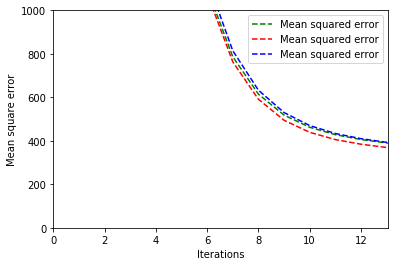

<Figure size 14400x1224 with 0 Axes>

In [19]:
plt.plot(itern1, MSE1, 'g--', label="Mean squared error")
plt.plot(itern2, MSE2, 'r--', label="Mean squared error")
plt.plot(itern3, MSE3, 'b--', label="Mean squared error")
plt.legend(loc='best')
plt.axis([0, len(itern1)/400+1, 0, 1000])
plt.xlabel('Iterations')
plt.ylabel('Mean square error')
plt.figure(figsize=(200,17))
plt.show()

## Mean square error vs iterations for 3 different learning rates with same initial weights

In [68]:
MSE41 = []
MSE42 = []
MSE43 = []
itern1 = []
itern2 = []
itern3 = []
class Airfoil4:

    def __init__(self, iters=30000, alpha=0.0002, reg_param=0):
        self.thetas=[]
        self.iters = iters
        self.alpha = alpha
        self.reg_param = reg_param

    def normalize(self, array):
        c = array.shape[1]
        for ind in range(c):
            col = array[:,ind]
            array[:,ind] = (col - col.min())/(col.max() - col.min())
        return array

    def train(self, trainpath):
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        thetass = np.random.rand(X_part.shape[1], 1)
        self.thetas = thetass.copy()
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern1.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE41.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
#             print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
        
        self.alpha = 0.0003
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = thetass.copy()
        
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern2.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE42.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
#             print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
            
        self.alpha = 0.00002
        train_data = np.genfromtxt(trainpath, delimiter=',')
        # np.random.shuffle(train_data)
        X_part = train_data[:,0:-1]
        Y_part = train_data[:,-1]
        X_part = self.normalize(X_part)
        X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        # print(X_part)
        x_train, self.x_test, y_train, self.y_test = train_test_split(X_part, Y_part, train_size=0.7)
        self.thetas = thetass.copy()
        
        print("thetas")
        print(self.thetas)
        # print(x_sums.shape)
        samples = x_train.shape[0]
        y_train = y_train.reshape((-1,1))
        oldcost = math.inf
        tolerance = 0.000001
        xt = x_train.transpose()
        for it in range(self.iters):
            itern3.append(it+1)
            y_temp = np.dot(x_train, self.thetas)
            err = np.subtract(y_temp, y_train)
            MSE43.append(np.square(err).sum()/x_train.shape[0])
            cost = ((np.square(err)).sum() + self.reg_param*(np.square(self.thetas).sum()))/(2*samples)
            if(oldcost - cost <= tolerance):
                break
            oldcost = cost
#             print("iter "+str(it+1)+" cost = "+str(cost))
            temp = np.dot(xt, err)
            temp = temp.reshape((-1,1))
            self.thetas *= (1 - (self.alpha*self.reg_param)/samples)
            self.thetas -= self.alpha*temp
    
    def predict(self, testpath):
        # test_data = np.genfromtxt(trainpath, delimiter=',')
        # X_part = test_data[:,0:-1]
        # Y_part = test_data[:,-1]
        # X_part = self.normalize(X_part)
        # X_part = np.hstack((X_part, np.ones((X_part.shape[0], 1))))
        preds = np.dot(self.x_test, self.thetas)
        print("score")
        print(r2_score(self.y_test, preds))
        return preds
    
model3 = Airfoil4()
model3.train('./Datasets/Question-3/airfoil.csv') # Path to the train.csv will be provided
prediction3 = model3.predict('./Datasets/q3/test.csv')

thetas
[[0.17521754]
 [0.65236796]
 [0.50600686]
 [0.70512094]
 [0.14607284]
 [0.23243769]]
thetas
[[0.17521754]
 [0.65236796]
 [0.50600686]
 [0.70512094]
 [0.14607284]
 [0.23243769]]
thetas
[[0.17521754]
 [0.65236796]
 [0.50600686]
 [0.70512094]
 [0.14607284]
 [0.23243769]]
score
0.5250153773665553


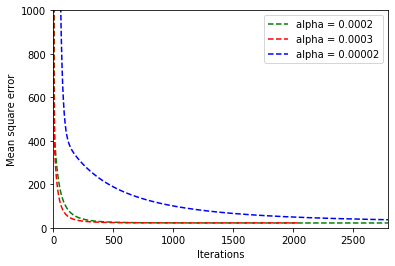

<Figure size 14400x1224 with 0 Axes>

In [70]:
plt.plot(itern1, MSE41, 'g--', label="alpha = 0.0002")
plt.plot(itern2, MSE42, 'r--', label="alpha = 0.0003")
plt.plot(itern3, MSE43, 'b--', label="alpha = 0.00002")
plt.legend(loc='best')
plt.axis([0, max(len(itern1), len(itern2))+1, 0, 1000])
plt.xlabel('Iterations')
plt.ylabel('Mean square error')
plt.figure(figsize=(200,17))
plt.show()

When 0-0.5% of values are missing of that feature  : Fill with mean/mode
    
When 8-10% of values are missing of that feature   : Fill with mean/mode

When 60-70% of values are missing of that feature  : Drop the feature altogether